In [110]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [111]:
x_train, y_train = load_data()

In [112]:
print(x_train.shape, y_train.shape)

(97,) (97,)


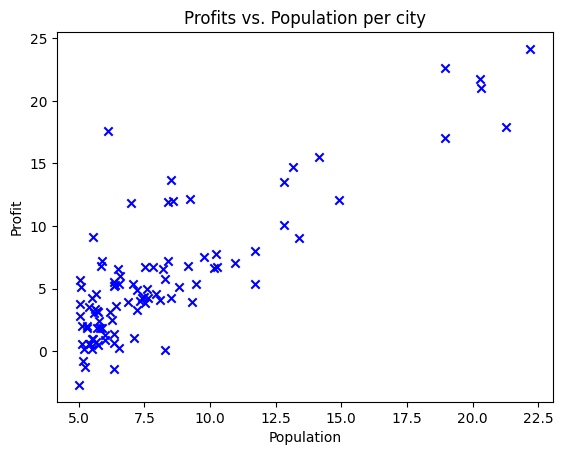

In [113]:
plt.scatter(x_train, y_train, marker='x', c='b')
plt.title("Profits vs. Population per city")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

In [114]:
def compute_cost(x, y, w, b): 
    cost = 0.0
    m = x.shape[0]

    for i in range(m):
        cost = cost + (((w*x[i]+b)-y[i])**2)
    final_cost = cost/(2*m)
    return final_cost

In [115]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(cost)

75.20338497891959


## Gradient Descent

In [116]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dw_i = 0
    db_i = 0

    for i in range(m):
        dw_i = dw_i + (x[i]*((w*x[i]+b)-y[i]))
        db_i = db_i + ((w*x[i]+b)-y[i])

        dw = dw_i/m
        db = db_i/m

    return dw, db

In [117]:
def gradient_descent(x, y, w, b, num_iters, cost_function, alpha, gradient_function):
    J_history = []
    p_hist = []

    for i in range(num_iters):
        dw, db = gradient_function(x, y, w, b)
        
        tmp_w = w-(alpha*dw)
        tmp_b = b-(alpha*db)

        w = tmp_w
        b = tmp_b

        if i < 1000:
            J_history.append(cost_function(x, y, w, b))
            p_hist.append([w, b])

        if i% math.ceil(num_iters/10)==0:
            print(f"Iteration: {i},   w: {w:4f}, b: {b:4f}, cost: {J_history[-1]:4f}")

    return w, b, J_history, p_hist 



In [118]:
w = 0
b = 0
alpha = 0.01
iterations = 1500

w_final, b_final, all_costs, all_wb = gradient_descent(x_train, y_train, w, b, iterations, compute_cost, alpha, compute_gradient)

Iteration: 0,   w: 0.653288, b: 0.058391, cost: 6.737190
Iteration: 150,   w: 0.888895, b: -0.868345, cost: 5.311381
Iteration: 300,   w: 0.961007, b: -1.586162, cost: 4.962606
Iteration: 450,   w: 1.016022, b: -2.133782, cost: 4.759616
Iteration: 600,   w: 1.057992, b: -2.551558, cost: 4.641474
Iteration: 750,   w: 1.090011, b: -2.870279, cost: 4.572713
Iteration: 900,   w: 1.114438, b: -3.113429, cost: 4.532694
Iteration: 1050,   w: 1.133073, b: -3.298928, cost: 4.515956
Iteration: 1200,   w: 1.147290, b: -3.440444, cost: 4.515956
Iteration: 1350,   w: 1.158136, b: -3.548406, cost: 4.515956


In [119]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_train[i] +b_final

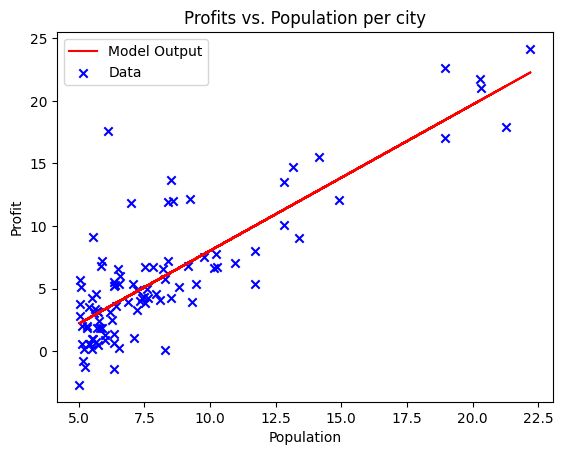

In [120]:
plt.plot(x_train, predicted, c='r', label='Model Output')

plt.scatter(x_train, y_train, label='Data', marker='x', c='b')

plt.title("Profits vs. Population per city")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.legend()
plt.show()